In [1]:
import neurokit as nk
import wfdb
from wfdb import processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [8]:
#creating a simulated ecg signal
ecg_rest = nk.ecg_simulate(duration = 12, sampling_rate = 500, bpm = 70, noise = 0.01)
ecg_tachycardia = nk.ecg_simulate(duration = 10, sampling_rate = 500, bpm = 90, noise = 0.01)
ecg_bradychardia = nk.ecg_simulate(duration = 10, sampling_rate  = 500, bpm = 55, noise = 0.05)
ecg = np.concatenate([ecg_rest, ecg_tachycardia, ecg_rest, ecg_bradychardia])

In [11]:
#creating a time array
time = np.array([i/1000 for i in range(0, len(ecg), 1)])
time.shape

(22000,)

<IPython.core.display.Javascript object>


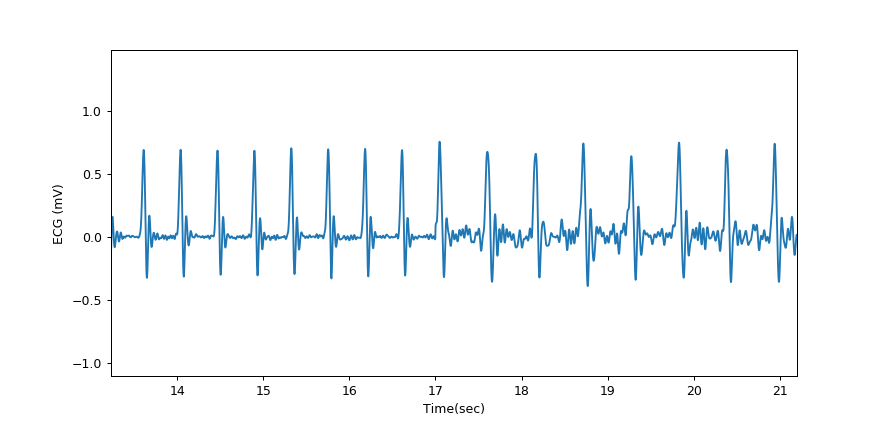

In [68]:
#plotting time and ecg data
%matplotlib notebook
plt.plot(time,ecg)
plt.xlabel('Time(sec)')
plt.ylabel('ECG (mV)')
plt.show()

In [17]:
#descriptive statistics noise section
ecg_slice = ecg[17000:]
pd.Series(ecg_slice).describe()

count    5000.000000
mean        0.048946
std         0.187526
min        -0.397830
25%        -0.033380
50%         0.015927
75%         0.064557
max         0.757993
dtype: float64

In [20]:
ecg_slice = ecg[11000:15000]
ecg_1 = pd.Series(ecg_slice).describe()
ecg_1

count    4000.000000
mean        0.050142
std         0.181716
min        -0.323528
25%        -0.008278
50%         0.003434
75%         0.024881
max         0.707713
dtype: float64

In [19]:
ecg_slice = ecg[11000:15000]
pd.Series(ecg_slice).std()

0.18171638731277834

In [23]:
cd C:\Users\Ruddy\Desktop\signal data

C:\Users\Ruddy\Desktop\signal data


In [24]:
ecg_1.to_csv('stats1.csv')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


    Using multitaper spectrum estimation with 7 DPSS windows


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


<IPython.core.display.Javascript object>


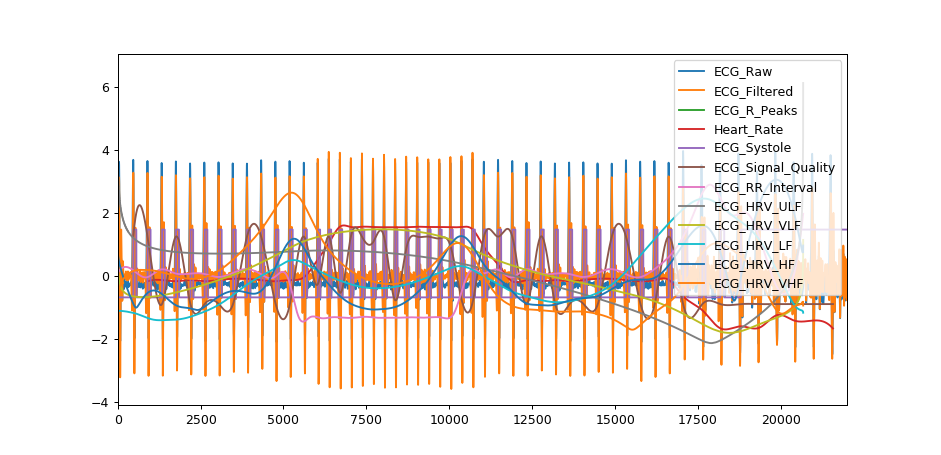

In [56]:
bio = nk.bio_process(ecg = ecg, sampling_rate = 500)
nk.z_score(bio['df']).plot()

<IPython.core.display.Javascript object>


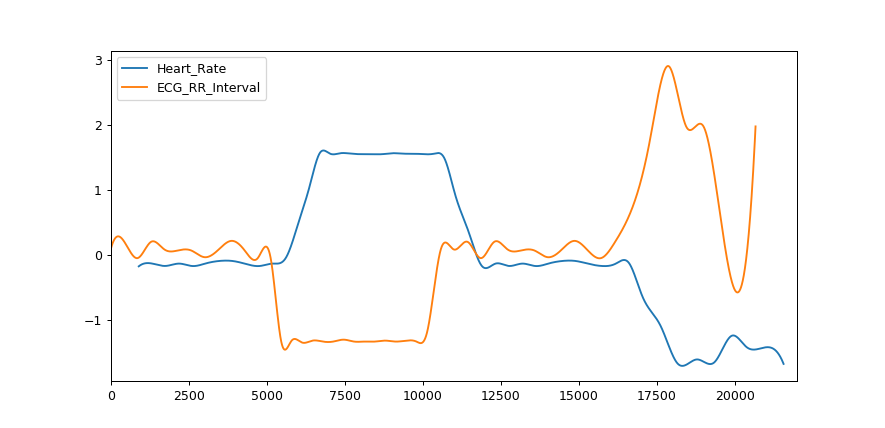

In [55]:
nk.z_score(bio['df'][['Heart_Rate', 'ECG_RR_Interval']]).plot()

In [39]:
pd.DataFrame(bio['df']).to_csv('df.csv')

In [40]:
bio

{'ECG': {'R_Peaks': array([  470,   899,  1336,  1756,  2193,  2622,  3050,  3478,  3899,
          4327,  4765,  5193,  5613,  6032,  6365,  6699,  7031,  7365,
          7698,  8031,  8366,  8699,  9032,  9365,  9699, 10032, 10366,
         10699, 11042, 11470, 11899, 12336, 12756, 13193, 13622, 14050,
         14478, 14899, 15327, 15765, 16193, 16613, 17049, 17630, 18171,
         18791, 19348, 19905, 20382, 21011, 21569]),
  'Cardiac_Cycles':                                   0         1         2         3         4   \
  2019-07-13 19:02:32.418599  0.010854  0.007783  0.005045  0.006652 -0.010606   
  2019-07-13 19:02:32.420599  0.011198  0.009852  0.004980  0.009743 -0.010321   
  2019-07-13 19:02:32.422599  0.011310  0.011769  0.005337  0.012898 -0.009620   
  2019-07-13 19:02:32.424599  0.011188  0.013455  0.006094  0.016020 -0.008521   
  2019-07-13 19:02:32.426599  0.010841  0.014840  0.007210  0.019007 -0.007060   
  2019-07-13 19:02:32.428599  0.010285  0.015866  0.008627 

<IPython.core.display.Javascript object>


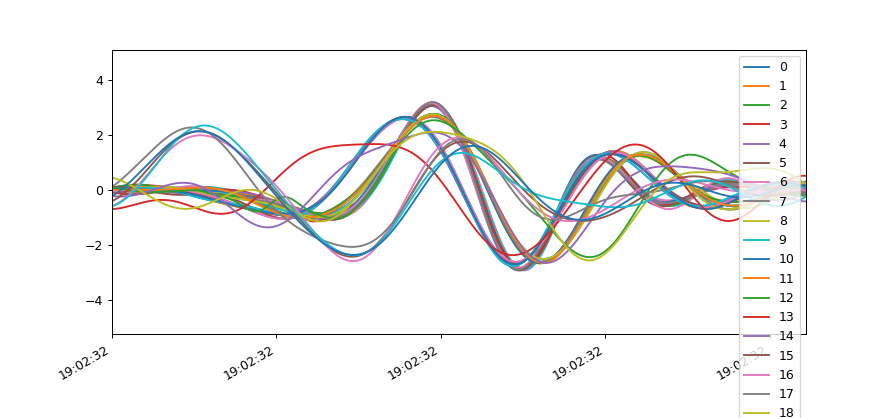

In [42]:
nk.z_score(bio['ECG']['Cardiac_Cycles']).plot()

In [43]:
bio['ECG']['Average_Signal_Quality']

0.4545650892463665

In [50]:
condition_list = ['rest', 'fast','rest','slow']
events = {'durations': [10000,5000,10000,5000],
         'onsets': [0,10000,15000,25000]}
events

{'durations': [10000, 5000, 10000, 5000], 'onsets': [0, 10000, 15000, 25000]}

In [51]:
#epochs
epochs = nk.create_epochs(bio['df'], events['onsets'])

<IPython.core.display.Javascript object>


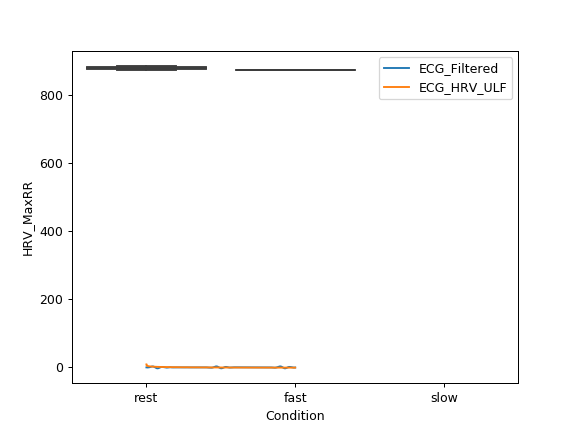

In [60]:
nk.z_score(epochs[0][['ECG_Filtered', 'ECG_HRV_ULF']]).plot()

In [65]:
data = {}  # Initialize an empty dict
for epoch_index in epochs:
    data[epoch_index] = {}  # Initialize an empty dict for the current epoch
    epoch = epochs[epoch_index]

    # ECG
    #baseline = epoch["ECG_RR_Interval"].iloc[-100:0].mean()  # Baseline
    rr_max = epoch["ECG_RR_Interval"].max()  # Maximum RR interval
    data[epoch_index]["HRV_MaxRR"] = rr_max   # Corrected for baseline

data = pd.DataFrame.from_dict(data, orient="index")  # Convert to a dataframe
data["Condition"] = condition_list  # Add the conditions
data  # Print

,HRV_MaxRR,Condition
0,885.429139,rest
1,872.622001,fast
2,873.336473,rest
3,NaN,slow


<IPython.core.display.Javascript object>


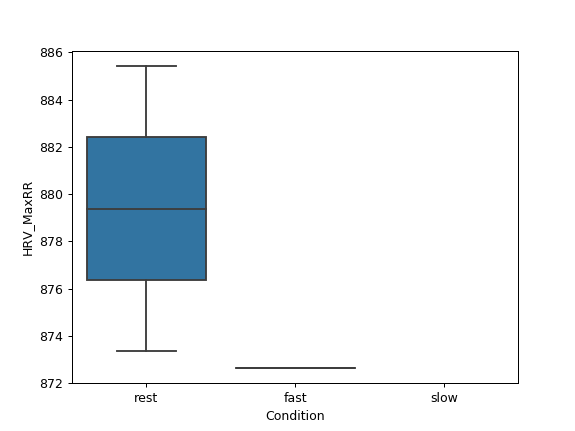

In [67]:
import seaborn as sns
%matplotlib notebook
sns.boxplot(x="Condition", y="HRV_MaxRR", data=data)

In [75]:
import scipy.io.wavfile as sio
sio.write('ecg_1.wav',500, ecg)